In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Aufgabe 27: Fehlerfortpflanzung

In [2]:
mean_a0 = mean_a1 = 1.0
sigma_a0 = sigma_a1 = 0.2
rho = -0.8

In [3]:
def y(x,a0,a1):
    return a0+a1*x

### b) numerisch sigma_y bestimmen durch Monte Carlo Simulation

In [4]:
rng = np.random.default_rng(42)

In [5]:
cov = [
    [sigma_a0**2, rho*sigma_a0*sigma_a1],
    [rho*sigma_a0*sigma_a1, sigma_a1**2]
]

In [6]:
a = rng.multivariate_normal(mean = [mean_a0, mean_a1], cov = cov, size=10000)
a.shape

(10000, 2)

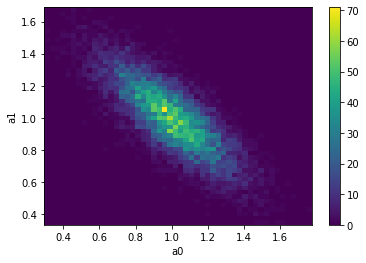

In [7]:
plt.hist2d(a[:,0],a[:,1],bins=50)
plt.xlabel('a0')
plt.ylabel('a1')
plt.colorbar();

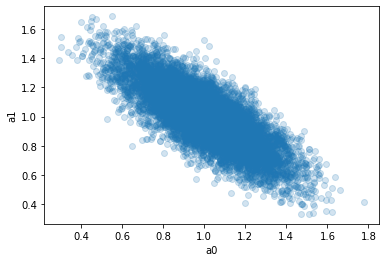

In [8]:
plt.scatter(a[:,0],a[:,1],alpha=0.2)
plt.xlabel('a0')
plt.ylabel('a1');

### c) Vorhersagen y(x) für x=-3,0,+3

#### analytisch

In [9]:
def sigma_y_analytical(x):
    return np.sqrt(sigma_a0**2+x**2*sigma_a1**2 + 2*x*sigma_a0*sigma_a1*rho)

In [10]:
for x in [-3,0,3]:
    print(f'y(x={x})={y(x,mean_a0,mean_a1):.4f} \t sigma_y_analytical(x={x})={sigma_y_analytical(x):.4f}')

y(x=-3)=-2.0000 	 sigma_y_analytical(x=-3)=0.7694
y(x=0)=1.0000 	 sigma_y_analytical(x=0)=0.2000
y(x=3)=4.0000 	 sigma_y_analytical(x=3)=0.4561


#### numerisch

In [11]:
for x in [-3,0,3]:
    y_ = y(x,a[:,0],a[:,1])
    print(f'y(x={x})={np.mean(y_):.4f} \t sigma_y_analytical(x={x})={np.std(y_):.4f}')

y(x=-3)=-2.0000 	 sigma_y_analytical(x=-3)=0.7661
y(x=0)=1.0012 	 sigma_y_analytical(x=0)=0.1980
y(x=3)=4.0023 	 sigma_y_analytical(x=3)=0.4594


Die analytisch und die numerisch berechneten Mittelwerte und Standardabweichungen sind sich sehr ähnlich und man erkennt deutlich, dass beide Varianten sinnvoll sind. Man sollte immer abwägen ob eine analytische Berechnung machbar ist, aber die numerische Berechnung liefert auch gute Ergebnisse.